## Cross Validation

### Reading in the Wine dataset

In [8]:
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', 
    header=None, 
    sep=',', 
    )
df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [9]:
%matplotlib inline

In [10]:
from matplotlib import pyplot as plt
import numpy as np
import math

X = df.values[:,1:] # feature vectors
y = df.values[:,0]  # class labels


In [11]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [12]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3.])

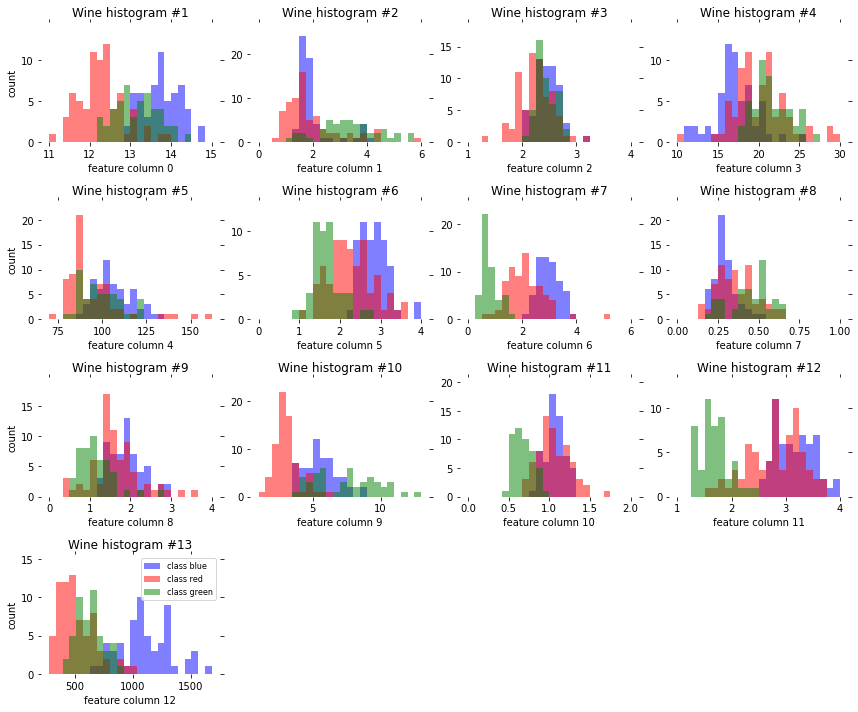

In [15]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12,10))

for ax,cnt in zip(axes.ravel(), range(13)):

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col, 
                   label='class %s' %col, 
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()
    
    # plot annotation
    #leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel('feature column %s' %cnt)
    ax.set_title('Wine histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)

# set y-axis labels
for ax in axes:
    ax[0].set_ylabel('count')


# hide subplots that are not being used
for i, ax in enumerate(axes.ravel()):

    if i == 12:
        ax.legend(loc='upper right', fancybox=True, fontsize=8)
    if i > 12:
        ax.axis('off')

fig.tight_layout()

plt.show()

### Resampling into Test and Training datasets

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.values[:,1:], df.values[:,0],
    test_size=0.30, random_state=123)

## Cross Validation

##### Accuracy is calculated as the number of correct predictions divided by the number of total predictions

In [18]:
X_train[:,0:1].shape

(124, 1)

In [19]:
np.concatenate((X_train[:,0].reshape(X_train.shape[0],1), X_train[:,0].reshape(X_train.shape[0],1)), axis=1).shape


(124, 2)

In [20]:
class ColumnExtractor(object):
    
    def __init__(self, cols):
        self.cols = cols
    def transform(self, X):
        col_list = []
        for c in self.cols:
            col_list.append(X[:, c:c+1])
        return np.concatenate(col_list, axis=1)

    def fit(self, X, y=None):
        return self
    
#ColumnExtractor(cols=(1,6)).transform(X_train)

In [29]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA

clf_all = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('reduce_dim', ColumnExtractor(cols=(0,5))),           
    ('classification', GaussianNB())   
    ])

clf_pca = Pipeline(steps=[
    ('scaler', StandardScaler()),    
    ('reduce_dim', PCA(n_components=2)),
    ('classification', GaussianNB())   
    ])

clf_lda = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('reduce_dim', LDA(n_components=2)),
    ('classification', GaussianNB())   
    ])



In [32]:
# Constructing the k-fold cross validation iterator (k=10)  

cv = KFold(n_splits=5,   # total number of samples
           # number of folds the dataset is divided into
           shuffle=True,
           random_state=123)

scores = [
    cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
            for clf in [clf_all, clf_pca, clf_lda]
    ]

In [33]:
print('Scores (all samples):', scores[0])
print("Accuracy: {:.2%} (+/- {:.2%})".format(scores[0].mean(), scores[0].std()))

Scores (all samples): [0.84       0.96       0.72       0.8        0.83333333]
Accuracy: 83.07% (+/- 7.75%)


In [34]:
for score,label in zip(scores, 
                       ['all samples', 
                        'PCA dim. red. (n=2)', 
                        'LDA dim. red. (n=2)', 
                        ]
                       ):
    print("Accuracy: {:.2%} (+/- {:.2%}), {:}".format(score.mean(), score.std(), label))

Accuracy: 83.07% (+/- 7.75%), all samples
Accuracy: 95.17% (+/- 3.91%), PCA dim. red. (n=2)
Accuracy: 96.77% (+/- 1.62%), LDA dim. red. (n=2)


### Training the classifier

##### Standardization

In [35]:
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

##### Dimensionality Reduction: Linear Discriminant Analysis (LDA)

In [36]:
sklearn_lda = LDA(n_components=2).fit(X_train, y_train)
X_train = sklearn_lda.transform(X_train)
X_test = sklearn_lda.transform(X_test)

##### Naive Bayes Classifier

In [37]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

pred_test = gnb_clf.predict(X_test)

#### Evaluation

In [38]:
from sklearn import metrics

pred_test = gnb_clf.predict(X_test)

print('Prediction accuracy for the test dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_test, pred_test)))

print('Confusion Matrix of the GNB-classifier')
print(metrics.confusion_matrix(y_test, gnb_clf.predict(X_test)))

Prediction accuracy for the test dataset
100.00%
Confusion Matrix of the GNB-classifier
[[14  0  0]
 [ 0 18  0]
 [ 0  0 22]]
